# **Mercado de casas para alquiler en USA**
---

## **Contexto comercial y objetivo comercial**

El alquiler de casas es un mecanismo moderno para la obtención de un alojamiento del tipo temporal, por la creciente imposibilidad de aspirar hacia la obtención de una casa propia, por ende, el mercado de alquileres se consolidó como una de las soluciones más rápidas para la solvencia de este problema y por lo cual, con el crecimiento poblacional vemos que es necesario generar cada vez más información para las personas que están entrando en esa etapa de su vida, en la cual aspiran hacia la independencia de su hogar. Como también la creación de esta información es factible de ser utilizada para promocionar su alquiler o alquileres, a las personas que dispongan de la posibilidad de alquilar departamentos, casas, etc. El presente dataset fue seleccionado en base a las posibilidades de análisis que brinda. Es interesante saber cómo se conforma el mercado de alquileres de casas en un país tan extenso como USA, donde podemos ver cómo interactúan diferentes variables en diferentes contextos. Las variables interesantes a analizar son varias en el presente dataset. A la hora de evaluar posibles personas que alquilen en el mercado de casas es importante dar información del precio, el tipo de vivienda, así como la región, el tamaño de la casa, los dormitorios, baños, acceso para discapacitados, que se está ofreciendo. Pero también es importante dar detalles sobre las posibilidades tales como poder tener gatos, perros, la cercanía a ciertos servicios para las personas, etc. Esta información es importante para los que alquilan las casas que están a la espera de maximizar sus ganancias así como empresas que generan información para luego vendersela a diferentes personas.

**Algunas preguntas de interes para trabajar con el presente dataset podrian ser:**

1) ¿Existe alguna relacion entre el precio del alquiler con el tamaño en pies cuadrados?

2) ¿Hay diferencias en el precio de alquiler en base al Estado que se alquile?

3) ¿La posibilidad de tener animales aumenta el precio del alquiler?

4) ¿Cual es el tipo de alquiler predominante?

5) ¿La posibilidad de fumar en el alquiler aumenta el precio?

**Como hipotesis podemos plantear:**

1) Existe una relacion positiva entre el precio de los alquileres y el tamaño de los mismos, medido en pies cuadrados.

2) La posibilidad de tener animales, poder fumar, etc. Se relaciona de manera positiva con el precio.


### **Pasamos a ver los datos**

---


Importamos el dataset directamente desde nuestro drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
Data1 = pd.read_csv('/content/drive/MyDrive/Entrega N1 Data Science/Casas USA/housing.csv', index_col=0) 
Data1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
id,,,,,,,,,,,,,,,,,,,,,
7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [3]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384977 entries, 7049044568 to 7049050010
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   url                      384977 non-null  object 
 1   region                   384977 non-null  object 
 2   region_url               384977 non-null  object 
 3   price                    384977 non-null  int64  
 4   type                     384977 non-null  object 
 5   sqfeet                   384977 non-null  int64  
 6   beds                     384977 non-null  int64  
 7   baths                    384977 non-null  float64
 8   cats_allowed             384977 non-null  int64  
 9   dogs_allowed             384977 non-null  int64  
 10  smoking_allowed          384977 non-null  int64  
 11  wheelchair_access        384977 non-null  int64  
 12  electric_vehicle_charge  384977 non-null  int64  
 13  comes_furnished          384977 non-null  int6

Pasamos a definir el DataFrame. Vamos a sacar algunas columnas que no aportan mucho al analisis que se quiere hacer, por eso utilizamos el comando drop.

In [4]:
df = pd.DataFrame(Data1)
df=df.drop(["url","region_url","image_url","description"],axis=1)
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
id,,,,,,,,,,,,,,,,,
7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
7049043759,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca


Vemos una descripcion de los datos:

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,384977.0,8825.722318,4.462200e+06,0.0000,805.0000,1036.0000,1395.0000,2.768307e+09
sqfeet,384977.0,1059.899565,1.915076e+04,0.0000,750.0000,949.0000,1150.0000,8.388607e+06
beds,384977.0,1.905345,3.494572e+00,0.0000,1.0000,2.0000,2.0000,1.100000e+03
baths,384977.0,1.480718,6.180605e-01,0.0000,1.0000,1.0000,2.0000,7.500000e+01
cats_allowed,384977.0,0.726890,4.455574e-01,0.0000,0.0000,1.0000,1.0000,1.000000e+00
dogs_allowed,384977.0,0.707918,4.547206e-01,0.0000,0.0000,1.0000,1.0000,1.000000e+00
smoking_allowed,384977.0,0.731771,4.430381e-01,0.0000,0.0000,1.0000,1.0000,1.000000e+00
wheelchair_access,384977.0,0.082111,2.745347e-01,0.0000,0.0000,0.0000,0.0000,1.000000e+00
electric_vehicle_charge,384977.0,0.012871,1.127177e-01,0.0000,0.0000,0.0000,0.0000,1.000000e+00
comes_furnished,384977.0,0.048128,2.140360e-01,0.0000,0.0000,0.0000,0.0000,1.000000e+00


In [6]:
df.baths.value_counts()

1.0     198184
2.0     134649
1.5      27363
2.5      13162
3.0       5549
0.0       3107
4.0       1495
3.5       1007
4.5        231
5.0        131
5.5         57
6.0         26
7.0          4
6.5          4
75.0         2
7.5          2
8.5          1
35.0         1
8.0          1
25.0         1
Name: baths, dtype: int64

Viendo el conteo de datos anterior podemos verificar la existencia de casas que poseen 1.5 baños, 2.5 baños, lo cual no tiene ningun tipo de sentido fisico cuando se habla de una casa, porque cuando se ofrece una casa se hace de manera de ofrecer un numero entero de baños. Por ende vamos a realizar un cambio.

In [7]:
df["baths"]=df["baths"].astype("int")
df.baths.value_counts()

1     225547
2     147811
3       6556
0       3107
4       1726
5        188
6         30
7          6
8          2
75         2
35         1
25         1
Name: baths, dtype: int64

In [8]:
df.beds.value_counts()

2       175513
1       117226
3        67037
4        11575
0        10978
5         2324
6          240
7           49
8           31
1000         2
1100         2
Name: beds, dtype: int64

Viendo los valores maximos de pies cuadrados y precios podemos decir que hay valores atipicos. El criterio en el que me baso es ver el valor maximo de ambas columnas, el cual si vemos hasta el 75% de la muestra el precio llega hasta $1395 y luego el maximo se encuentra alojado en un numero con nueve ceros luego de la coma, lo cual no tiene logica a pagar por un alquiler a menos que la persona que lo busque sea millonario. Por el lado de los pies cuadrados podemos ver que el 75% de la muestra llega hasta 1150 pies, donde luego nuevamente el maximo se aloja en un numero con 6 ceros luego de la coma, provocando otra ves problemas para el analisis posterior. Por ende tomo los siguientes recaudos, atado a posteriores modificaciones de ser necesario, para poder empezar con los graficos.Tambien tenemos algunas preguntas como por ejemplo, quien alquilaria una casa con 75 baños, 35 baños o 25 baños. Suponiendo que la persona sea adinerada y se pudiera dar el lujo de alquilar alguna de las casas disponibles, el tener mas de 7 baños ya seria una casa totalmente excesiva para que viva cualquier familia. Por ende vamos a tener que modificar algunas cosas. Lo mismo sucede cuando hablamos de las camas, vemos que hay registros con mas de 1000 camas disponibles, una locura, a menos que se alquile un hotel entero.

In [9]:
limpieza1 = ((df["beds"]>7) | (df["baths"]>7) | (df["sqfeet"]<120) | (df["sqfeet"]>5000) | (df["price"]<100) | (df["price"]>4000))
df = df[~limpieza1]

Vamos a ver si hay valores nulos

In [10]:
df.isna().sum()

region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             78110
parking_options            139016
lat                          1890
long                         1890
state                           0
dtype: int64

Eliminamos los registros que tienen valores nulos para la categoria opciones de lavado y opciones de estacionamiento. 

In [11]:
df1 = df.fillna(0)


In [12]:
df1.isna().sum()

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

### **Graficos**

---

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np

Vamos a analizar la cantidad de alquileres disponibles por Estado:

In [14]:
df1.state.value_counts()

ca    31703
fl    31693
tx    30722
nc    18369
mi    14408
ga    13751
oh    12689
tn    11405
co    11205
va    10960
sc     9879
pa     9787
ny     9775
il     9623
al     8177
or     8032
ks     7796
ia     7430
md     7413
mn     7389
la     7212
wa     6968
az     6610
wi     6574
in     6384
ok     5750
nj     5649
ky     5409
ut     5126
ms     4850
ma     4746
id     4427
ct     3735
nd     3402
ar     3135
nv     2811
nm     2772
ne     2675
dc     2437
ak     2151
mo     2147
de     2031
ri     1872
sd     1769
hi     1762
nh     1753
mt     1314
wv      803
vt      517
me      413
wy      186
Name: state, dtype: int64

Graficamente lo anterior se puede ver:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Alquileres disponibles por estados')

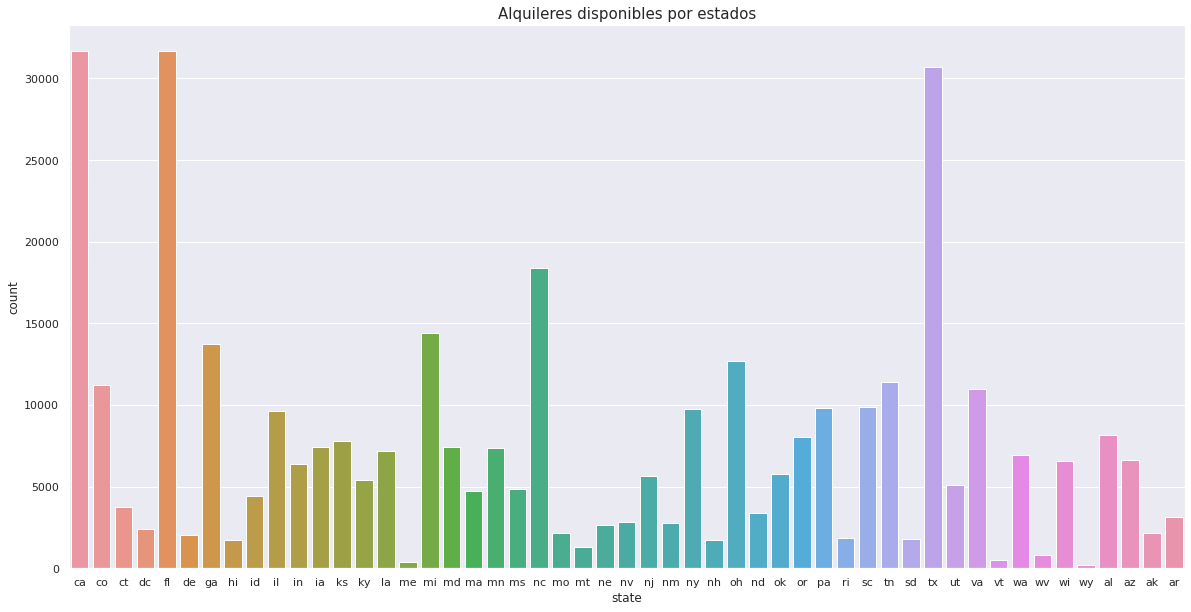

In [17]:
sns.countplot(df1["state"])
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Alquileres disponibles por estados', size=(15))

Observando el grafico anterior, podemos ver que en tres estados sobrepasan facilmente la barrera de los 25000 alquileres disponibles. Los cuales son el estado de California, Florida y Texas. Seguidos por Carolina del Norte y Michigan, completando asi el top 5 de Estados con mayor disponibilidad de alquileres.

Con el grafico anterior es posible aconsejar a las personas que esten en busca de un alquiler que tengan como referencia los estados con mayores posibilidades de alquiler para asi tener mas opciones a la hora de buscar.
Por el lado de las empresas inmobiliarias, es importante tener nocion tambien de lo mismo porque aumentaria las posibilidades de que ellos ofrezcan esos alquileres a las personas que estan en la busqueda de una vivienda. 

Vamos a ver cuales son los tipos alquileres disponibles:

In [18]:
df1.type.value_counts()

apartment          314497
house               32219
townhouse           15702
condo                6018
duplex               4963
manufactured         4103
cottage/cabin         723
loft                  681
flat                  514
in-law                169
land                    5
assisted living         2
Name: type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Tipos de alquileres disponibles')

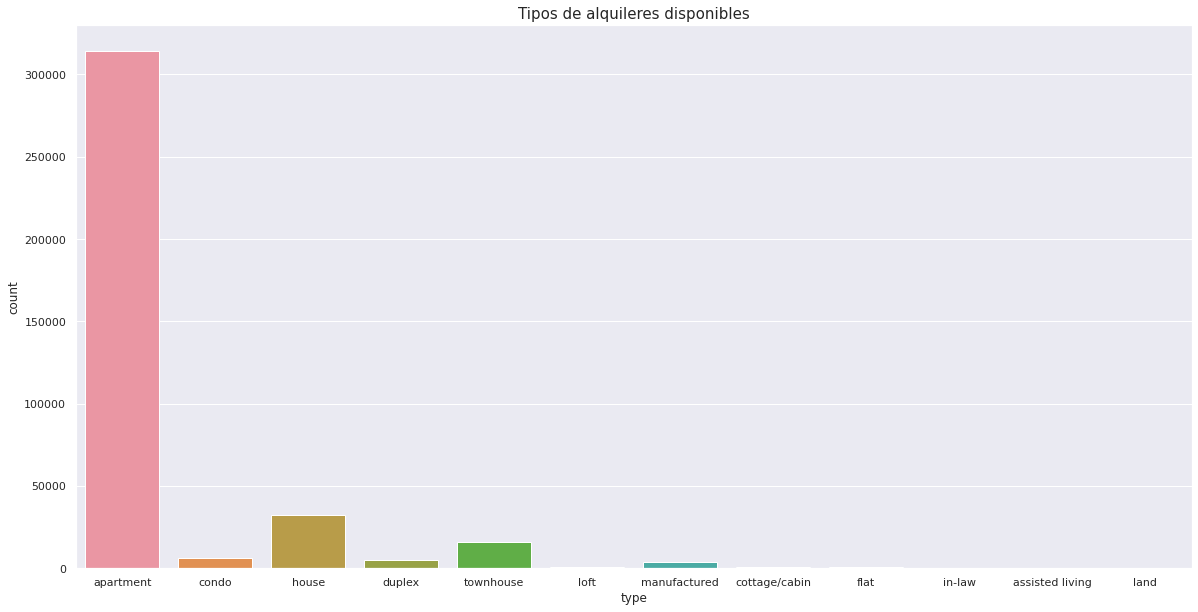

In [16]:
sns.countplot(df1["type"])
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Tipos de alquileres disponibles', size=(15))

Es posible notar la abismal diferencia entre la posibilidad de alquilar un departamento y cualquiera de las otras opciones. Las casas son la segunda opcion mas presente en el dataset.

Analicemos un poco los precios

Text(0.5, 1.0, 'Distribucion de precios')

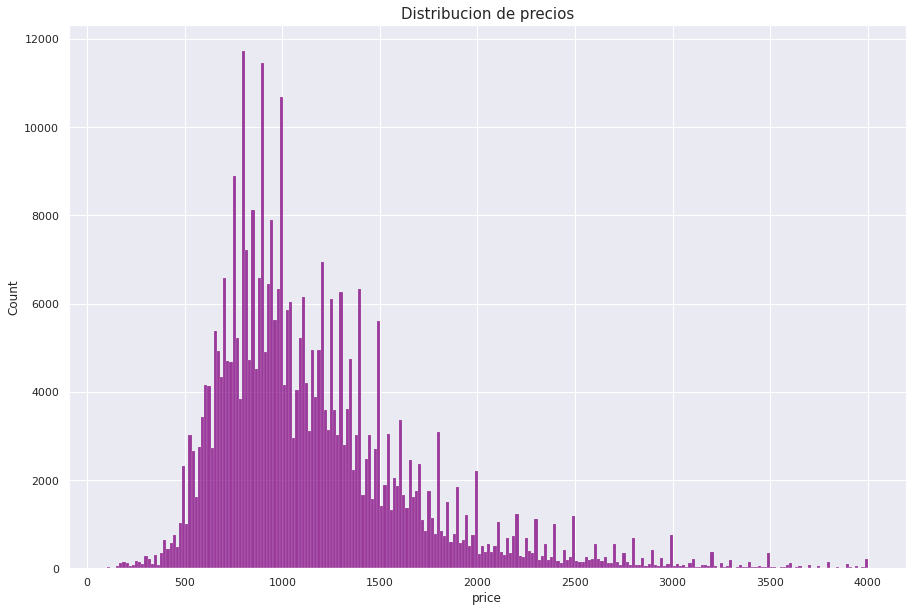

In [ ]:
sns.histplot(df1["price"], color='purple', bins='auto')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Distribucion de precios', size=(15))

In [ ]:
df.price.mean()

1169.4404919967544

Viendo el grafico anterior podemos observar la presencia de una distribucion sesgada hacia la izquierda, donde la maxima frecuencia esta alojada entre un valor de 750 a 1000 aproximadamente. Es posible notar picos cada vez que se aumenta $500 usd el precio del alquiler.

Sumado a lo anterior, podemos especificar que el precio promedio del total de alquileres se ubica en $1169 USD.

Veamos la distribucion de los pies cuadrados

Text(0.5, 1.0, 'Distribucion de pies cuadrados')

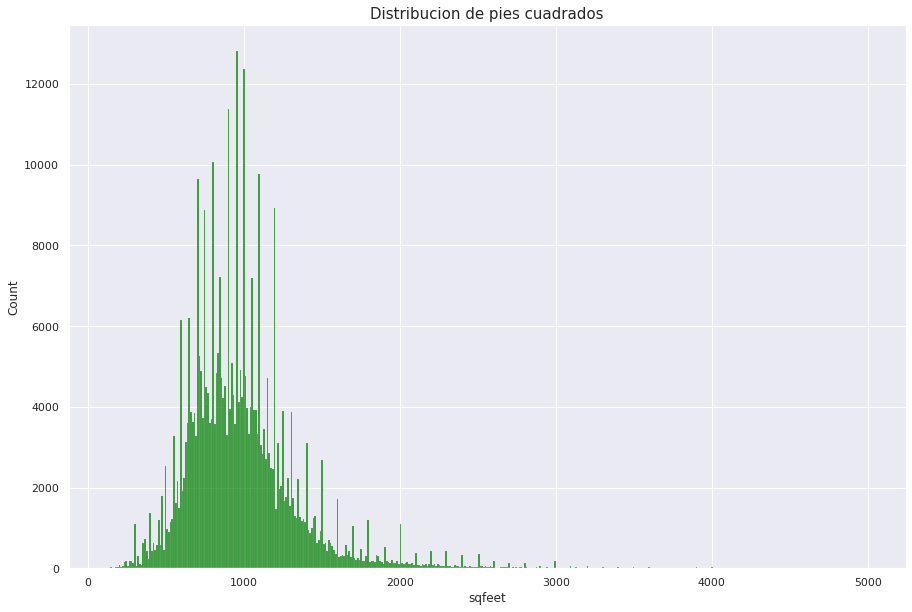

In [ ]:
sns.histplot(df1["sqfeet"], color='green')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Distribucion de pies cuadrados', size=(15))

In [ ]:
df.sqfeet.mean()

990.064039136345

Analizando el grafico anterior encontramos una distribucion sesgada hacia la izquierda, con una concentracion de los pies cuadrado en el rango de 500 a 1500 pies cuadrados aproximadamente.

En concordancia a lo anterior, el promedio del total de la muestra en referencia a los pies cuadrados se ubica en 990 pies.

Desglosando la informacion por Estado, tanto en precio como en pies cuadrados nos encontramos con:

In [ ]:
df2 = df.groupby('state').mean('price')
df2.iloc[:, 0:2]


,price,sqfeet
state,,
ak,1175.663412,940.686657
al,880.614895,1050.375321
ar,863.833174,1027.322807
az,1051.837216,875.589259
ca,1796.718512,960.144781
co,1498.386613,982.941544
ct,1347.948594,999.471754
dc,1851.363151,901.572425
de,1279.432792,930.122600


Graficamente el precio promedio por Estado quedaria representado como:

Text(0.5, 1.0, 'Precios por Estado')

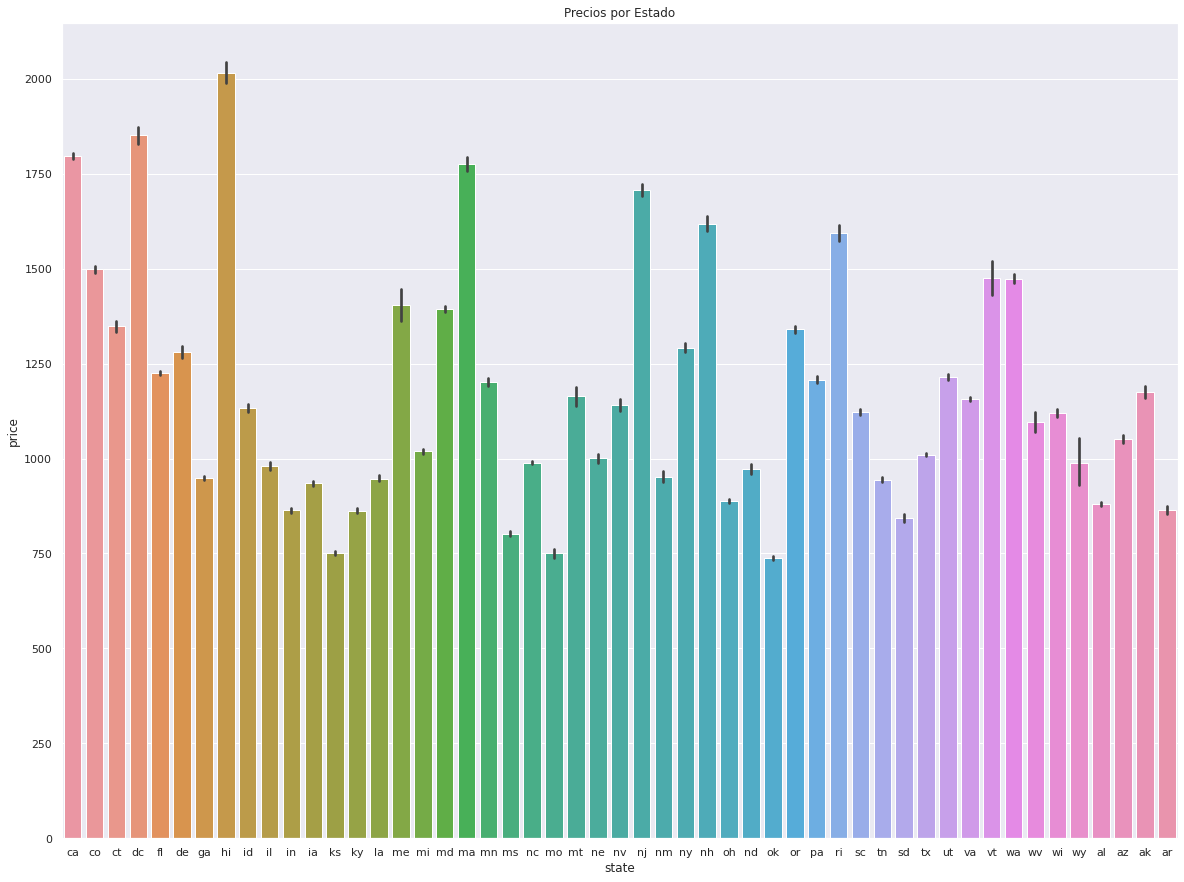

In [ ]:
sns.barplot(x=df1["state"],y=df1["price"])
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.title('Precios por Estado')

Al ver la grafica se puede apreciar que Hawai (hi) es el estado mas caro en promedio para alquilar. Seguido a este, se encuentran el distrito federal (dc) y california.

En base a lo anterior podemos decir que para las personas que buscan un alquiler deberian analizar la posibilidad de ir a lugares como Oklahoma, Misuri que son de los lugares mas baratos, en promedio, para poder alquilar y si es que su tipo de trabajo tambien los deja, aunque hoy en dia con la modalidad de homeoffice es mucho mas facil trabajar a distancia.

Por el lado de los inversionistas, esta claro que Hawai es un lugar para vacionar, donde entonces pueden realizar ciertas inversiones para la creacion de viviendas y asi poder obtener ganacias en las temporadas altas, donde las personas busquen vacacionar con un alojamiento en esa isla. 

Text(0.5, 1.0, 'Pies cuadrados por Estado')

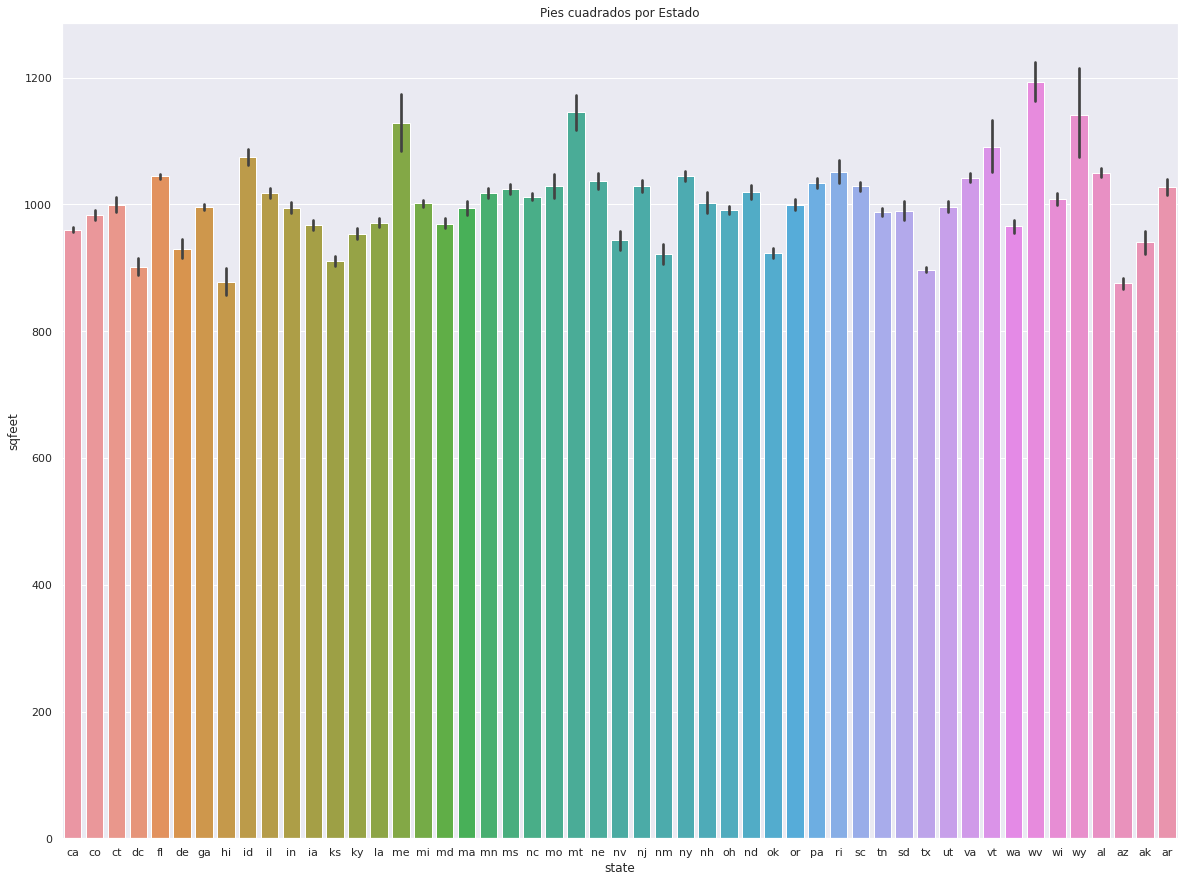

In [ ]:
sns.barplot(x=df1["state"],y=df1["sqfeet"])
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.title('Pies cuadrados por Estado')

Observando el grafico anterior podemos afirmar que Virgina del Oeste es el estado con mayor pies cuadrados en promedio, seguido de Montana y Wyoming.

Esto puede ser interesante para aquellas personas que busquen casas en promedio mas amplias, en terminos de pies cuadrados, para alquilar o para las mismas empresas de inmobiliaria que ofrecen casas a familias numerosas para que vayan a vivir. 

Text(0.5, 1.0, 'Tipos de casa discriminadas por precio')

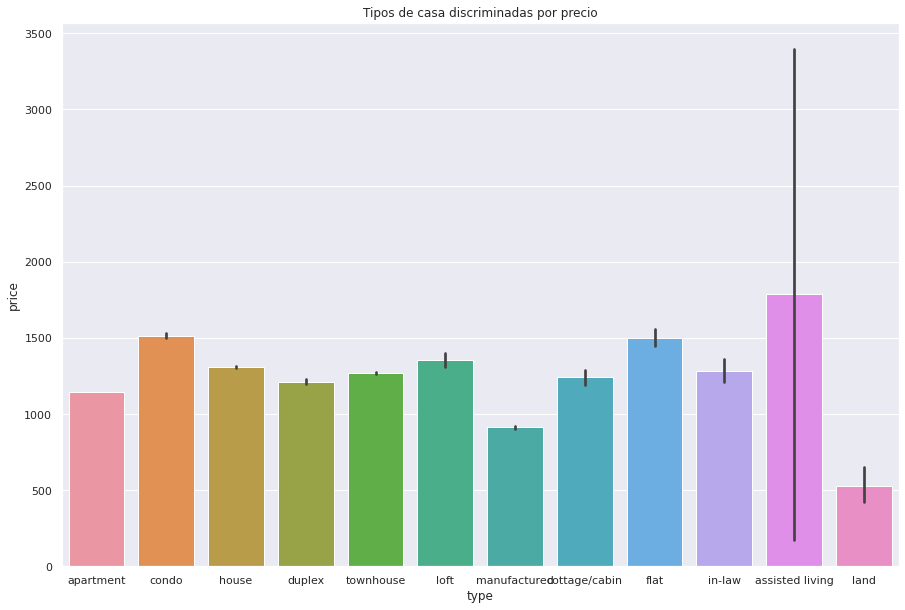

In [ ]:
sns.barplot(x=df1["type"],y=df1["price"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Tipos de casa discriminadas por precio')

Como es posible notar en la grafica anterior, vemos que la vivienda con asistencia es la mas cara en promedio, esto se debe al servicio adicional que se ofrece ademas del alquiler.
Los pisos tienen un precio en promedio mas elevado que los de los departamentos, donde la diferencia entre ambos es el lujo que ofrecen estos ultimos. Pero si con menor precio obtenemos mayores lujos es una opcion rentable para aquellas personas que esten buscando mudarse, tendran mejores comodidades a un menor precio en promedio. 

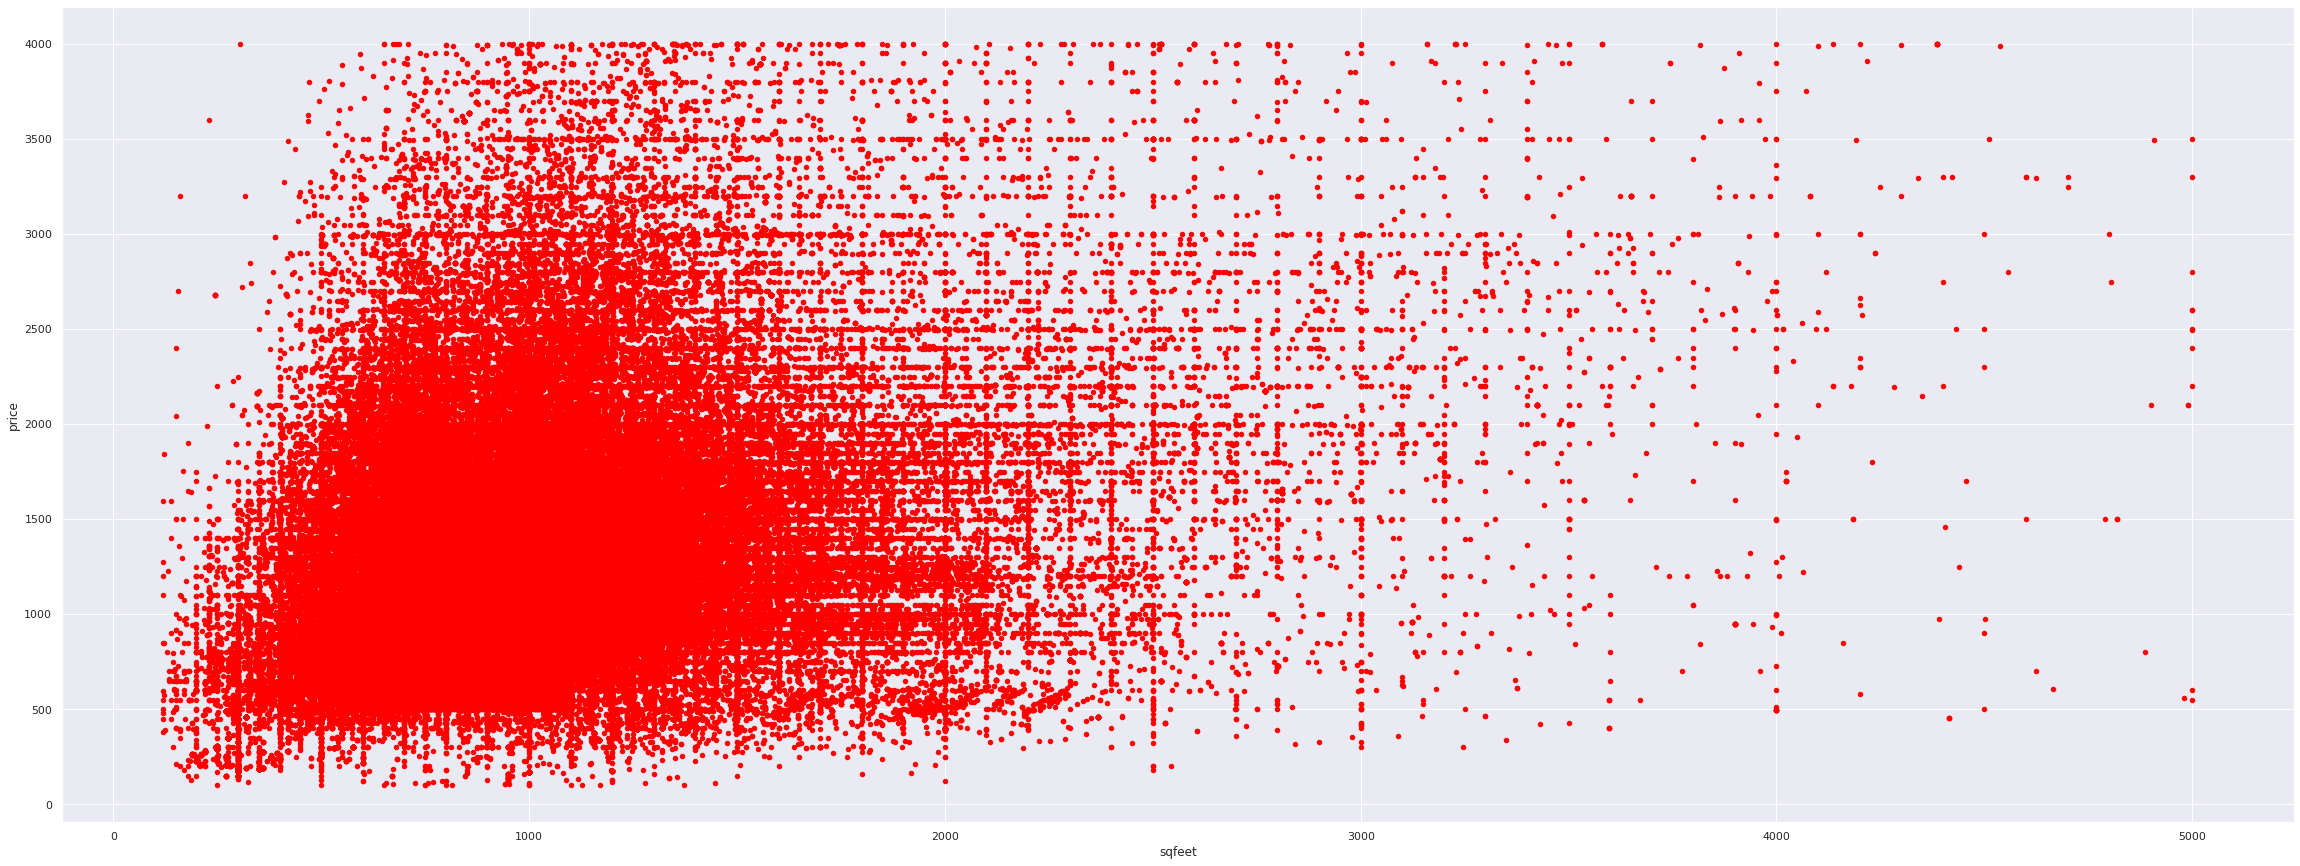

In [ ]:
df.plot(kind='scatter', x='sqfeet', y='price',figsize=(40,15), c="red")

En el grafico anterior no es posible visualizar ningun tipo de relacion entre la distribucion del precio y de los pies cuadrados, por ende no estamos en condiciones de confirmar ningun tipo de relacion entre ambos. 

Pasamos a ver lo que son las correlaciones entre las diferentes variables para finalizar el analisis de los datos:

In [ ]:
df1.corr()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
price,1.000000,0.356398,0.198075,0.260981,-0.028669,-0.022429,-0.165205,0.074490,0.127113,0.006329,0.026935,-0.171624
sqfeet,0.356398,1.000000,0.755272,0.587893,-0.089587,-0.047388,-0.039941,-0.022113,0.003194,0.002687,0.004870,0.069489
beds,0.198075,0.755272,1.000000,0.588413,-0.074515,-0.038233,-0.003953,-0.042118,-0.019319,0.006904,0.023474,0.034400
baths,0.260981,0.587893,0.588413,1.000000,-0.017881,0.018453,-0.014947,0.036871,0.011227,0.042935,-0.093743,-0.003812
cats_allowed,-0.028669,-0.089587,-0.074515,-0.017881,1.000000,0.886927,0.014952,0.121472,0.048485,-0.053267,-0.009401,0.024343
dogs_allowed,-0.022429,-0.047388,-0.038233,0.018453,0.886927,1.000000,0.012191,0.128360,0.048390,-0.033196,-0.049081,0.013111
smoking_allowed,-0.165205,-0.039941,-0.003953,-0.014947,0.014952,0.012191,1.000000,-0.223147,-0.093805,-0.159858,-0.158926,0.147319
wheelchair_access,0.074490,-0.022113,-0.042118,0.036871,0.121472,0.128360,-0.223147,1.000000,0.190523,0.199807,0.003564,-0.024544
electric_vehicle_charge,0.127113,0.003194,-0.019319,0.011227,0.048485,0.048390,-0.093805,0.190523,1.000000,0.070184,0.024566,-0.052957
comes_furnished,0.006329,0.002687,0.006904,0.042935,-0.053267,-0.033196,-0.159858,0.199807,0.070184,1.000000,-0.005938,-0.010155


Lo anterior se puede visualizar graficamente con un mapa de calor para correlacion, el cual queda de la siguiente forma: 

Text(0.5, 1.0, 'Mapa de calor para correlacion')

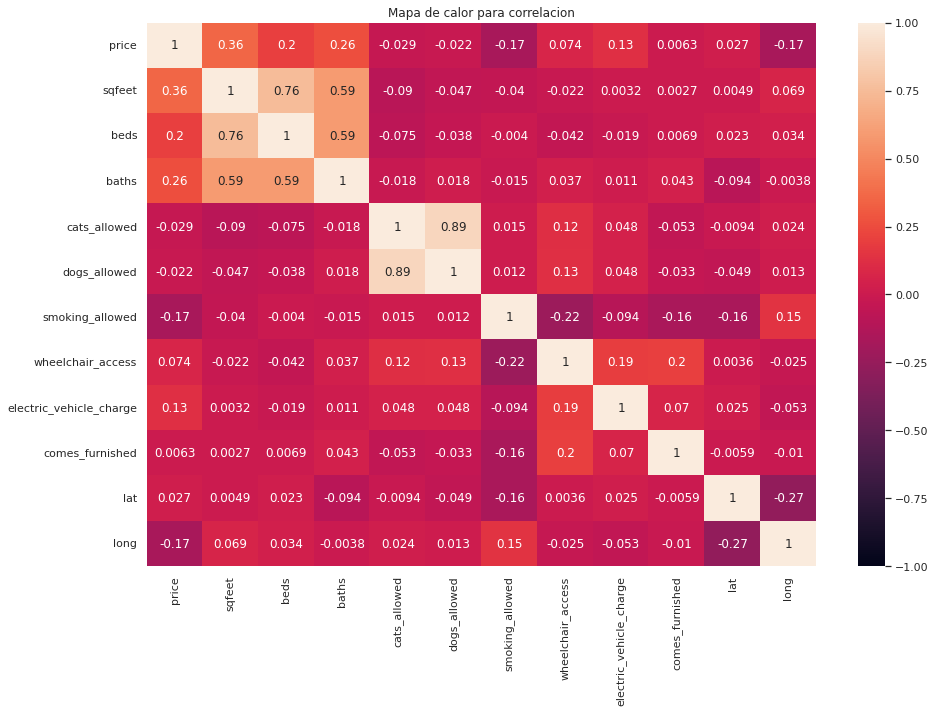

In [ ]:
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Mapa de calor para correlacion')

Podemos apreciar que el factor que se permitan perros, gatos o fumar afecta de manera negativa el precio, no parece afectarlo de manera sustancial pero se requiririan ciertos test para validar este enunciado.

Text(0.5, 1.0, 'Distribucion por poder tener perros')

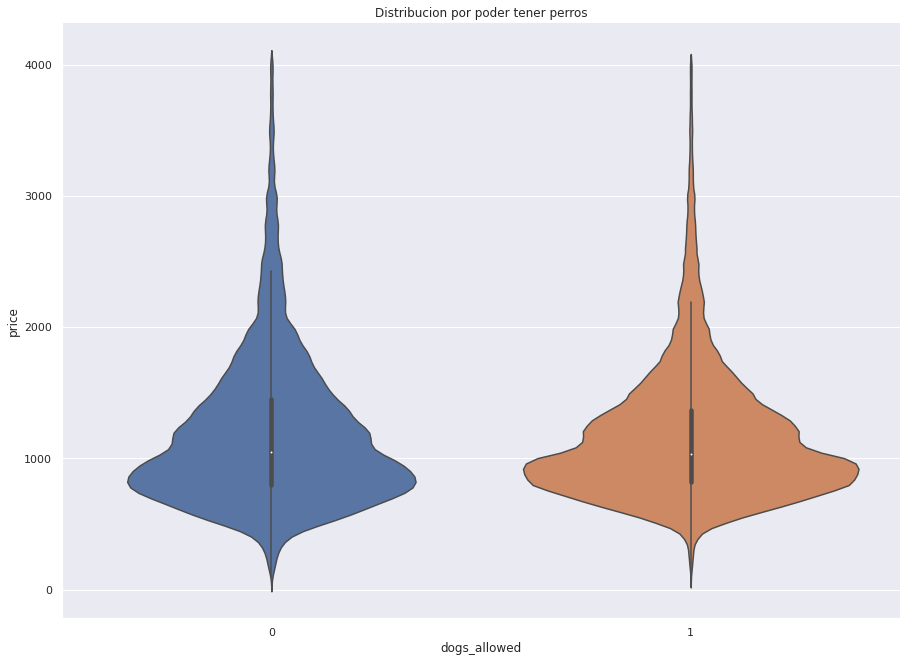

In [ ]:
sns.catplot(x = "dogs_allowed", y = "price", data = df1, kind = "violin")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Distribucion por poder tener perros')

Vemos que no hay diferencias notorias en base a la posibilidad de tener perros y el precio. 

Text(0.5, 1.0, 'Distribucion por poder tener gatos')

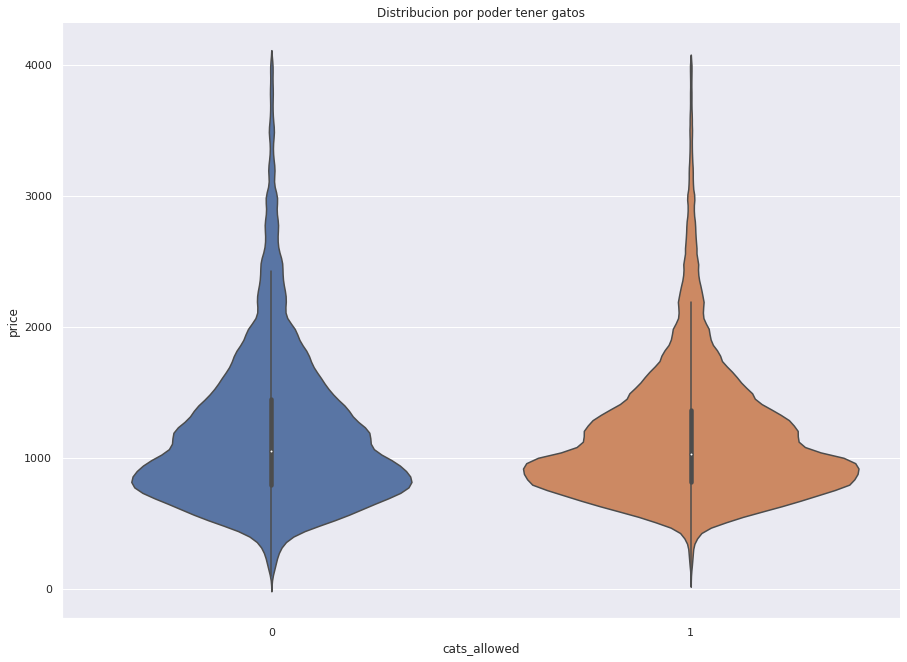

In [ ]:
sns.catplot(x = "cats_allowed", y = "price", data = df1, kind = "violin")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Distribucion por poder tener gatos')

Lo mismo que en el caso anterior. 

Text(0.5, 1.0, 'Distribucion por poder fumar')

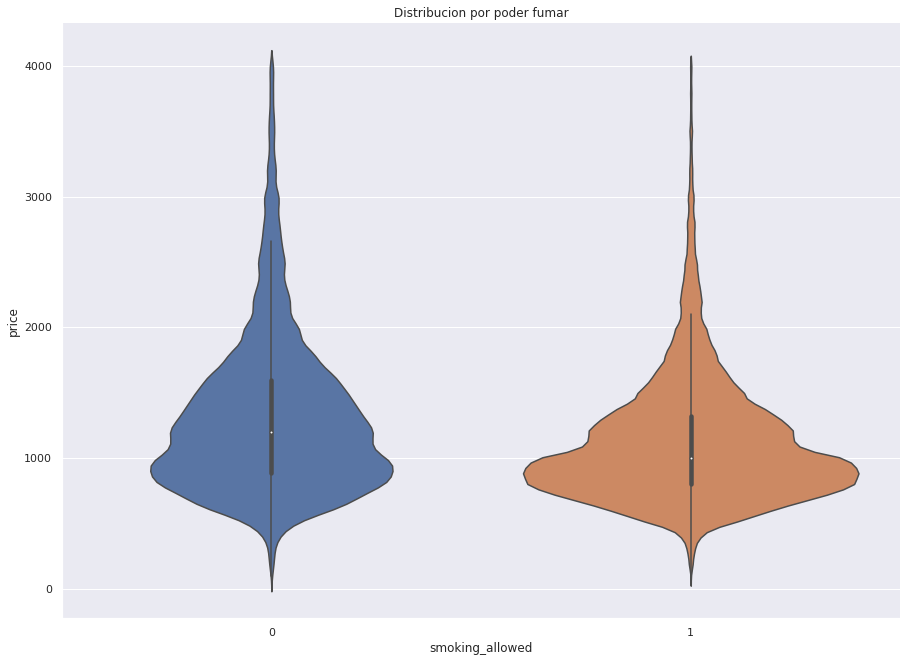

In [ ]:
sns.catplot(x = "smoking_allowed", y = "price", data = df1, kind = "violin")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Distribucion por poder fumar')

A simple vista pareceria que en los alquileres que no se puede fumar tienen un precio mayor, a los que si permiten esta ultima accion. 
Podria ser una buena opcion para aquellas personas que esten buscando alquileres baratos, independientemente de si fume o no.